# Modeling the North America Video Game Sales
Understand the features that influence North america video game sales


In [201]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [202]:
_  = os.path.join('Video_Games_Sales_as_at_22_Dec_2016.csv')
video_game_df = pd.read_csv(_)

Dropping features we don't have prior to release

In [203]:
na_df = video_game_df.drop(['EU_Sales', 
                            'JP_Sales', 
                            'Other_Sales', 
                            'Global_Sales',
                            'Critic_Score',
                            'Critic_Count',
                            'User_Score',
                            'User_Count'], axis=1)

In [204]:
na_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,NaN,NaN


In [205]:
# Looking at NA _sales to see if column is float type

na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 8 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


There are no nan values in Sales. But we observered some missing values in "Developer" and "Rating". 

Below we will check whether these missing values coming from older games or not.
 

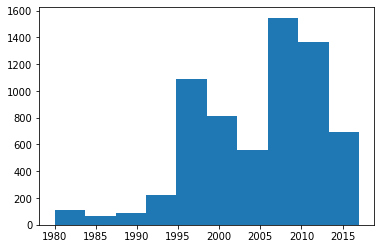

In [206]:
plt.hist(na_df[na_df.Developer.isna()].Year_of_Release.values)

plt.show()

It looks like it is not necessarily older games has missing values.

In [207]:
# recording missing value counts by year
na_df[na_df.Developer.isna()].Year_of_Release.value_counts().iloc[:10]

2010.0    451
2008.0    438
2011.0    409
2009.0    407
2007.0    376
1998.0    346
2006.0    326
1999.0    296
2012.0    285
1997.0    268
Name: Year_of_Release, dtype: int64

In [208]:
# Replacing null values with unknown
na_df['Developer'] = na_df['Developer'].replace(to_replace = np.nan, value = 'Unknown')

In [209]:
#Replacing null value of rating with unknown
na_df['Rating'] = na_df['Rating'].fillna('Unknown')

In [210]:
na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 8 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
Developer          16719 non-null object
Rating             16719 non-null object
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


In [211]:
#Dropped all remaining null values
na_df.dropna(inplace=True)

In [212]:
na_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 8 columns):
Name               16416 non-null object
Platform           16416 non-null object
Year_of_Release    16416 non-null float64
Genre              16416 non-null object
Publisher          16416 non-null object
NA_Sales           16416 non-null float64
Developer          16416 non-null object
Rating             16416 non-null object
dtypes: float64(2), object(6)
memory usage: 1.1+ MB


In [213]:
na_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,Unknown,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,Unknown,Unknown
...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,Unknown,Unknown
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,Unknown,Unknown
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,Unknown,Unknown
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,Unknown,Unknown


looking at how many value counts of platforms there are. 

We have 31 different consoles.

We will OneHotEncode the categories.

Tail will be determined.

In [214]:
na_df.Platform.value_counts()

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

looking at the different tyoes of genres

In [215]:
na_df.Genre.value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

looking at the number of publishers in our dataset

In [216]:
na_df.Publisher.value_counts()

Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          930
Konami Digital Entertainment     825
                                ... 
ASK                                1
Epic Games                         1
Warashi                            1
Mycom                              1
Answer Software                    1
Name: Publisher, Length: 579, dtype: int64

(array([555.,  11.,   3.,   1.,   1.,   3.,   3.,   1.,   0.,   1.]),
 array([1.0000e+00, 1.3530e+02, 2.6960e+02, 4.0390e+02, 5.3820e+02,
        6.7250e+02, 8.0680e+02, 9.4110e+02, 1.0754e+03, 1.2097e+03,
        1.3440e+03]),
 <a list of 10 Patch objects>)

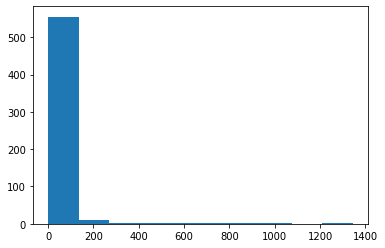

In [217]:
plt.hist(na_df.Publisher.value_counts())

In [239]:
len(na_df.Publisher)

5021

In [218]:
na_df.Publisher.value_counts()[na_df['Publisher'].value_counts()<50]

GT Interactive       45
PQube                45
Destineer            45
DTP Entertainment    43
Alchemist            43
                     ..
ASK                   1
Epic Games            1
Warashi               1
Mycom                 1
Answer Software       1
Name: Publisher, Length: 533, dtype: int64

In [219]:
len(na_df.Publisher.value_counts()[na_df['Publisher'].value_counts()<50])

533

For the initial modelling we will ignore the publisher name. Later on we need to decide/figure out how to move on this.

-- Find some threshold values for platform and OneHotEncode this column together with Genre. 

-- Subtract the minimum year from release year and if you want you can ignore certain years.

-- Fit a linear regression model to the data you created.

-- Find predicted values

-- Find residuals 

-- Plot residual on y-axis and plot predicted values on x-axis (Residual plots!!)

In [220]:
na_df.Platform.value_counts()

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

I want to filter consoles after 2007 becuase they are the more recent consoles games have been released on

In [221]:
na_df2 = na_df[na_df['Year_of_Release'] > 2007]

We want to release our game on console and pc, so we are dropping the handheld gaming sysytems.

In [233]:
handhelds = ['DC', 'DS', 'GB', 'PSP', '3DS', 'PSV']

In [243]:
len(na_df.Publisher)

260

In [241]:
na_df = na_df[(na_df['Year_of_Release'] > 2007) & (na_df['Platform'].isin(handhelds) ==False)]

In [235]:
na_df2.head()

""
0


In [236]:
na_df2 = pd.get_dummies(['Platform'], drop_first = True)

In [237]:
_ = pd.get_dummies(na_df['Platform'], drop_first=True)
na_df = pd.concat([na_df, _], axis=1)

In [238]:
na_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Developer,Rating,3DO,3DS,...,XB,XOne,PS2,PS3,PS4,Wii,WiiU,X360,XB,XOne
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,Nintendo,E,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,Nintendo,E,0,0,...,0,0,0,0,0,1,0,0,0,0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,Nintendo,E,0,0,...,0,0,0,0,0,1,0,0,0,0
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,Good Science Studio,E,0,0,...,0,0,0,0,0,0,0,1,0,0
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,Nintendo,E,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,Atomic Games,T,0,0,...,0,0,0,0,0,0,0,0,0,0
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,SimBin,E10+,0,0,...,0,0,0,0,0,0,0,0,0,0
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,DTP Entertainment,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
16713,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,Unknown,Unknown,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
na